**<span style="color: #DBC39E;">In The Name of God</span>**

---

**<span style="color: #DBC39E;">Erfan Falahati</span>**

**<span style="color: #DBC39E;">SID:</span> <span style="color: #DBC39E;">810102491</span>**

# **<span style="color: #3399FF;">Computer Assignment #3: Machine Learning</span>**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import time

In [11]:
DATASET_PATH = 'content/Grades.csv'
CLEANED_DATASET_PATH = 'content/cleaned_data.csv'

df = pd.read_csv(DATASET_PATH)

# **<span style="color: #DBC39E;">EDA</span>**

## **<span style="color: #66B2FF;">Dataset Overview</span>** 

In [12]:
df.head(5)

,university,sex,age,address,motherEducation,fatherEducation,motherJob,fatherJob,reason,travelTime,...,internet,romantic,freeTime,goOut,Dalc,Walc,absences,EPSGrade,DSGrade,finalGrade
0,PR,F,18,U,4,4,at_home,teacher,course,2,...,no,no,3,4,1,1,6,5,6,6
1,PR,F,17,U,1,1,at_home,other,course,1,...,yes,no,3,3,1,1,4,5,5,6
2,PR,F,15,U,1,1,at_home,other,other,1,...,yes,no,3,2,2,3,10,7,8,10
3,PR,F,15,U,4,2,health,services,home,1,...,yes,yes,2,2,1,1,2,15,14,15
4,PR,F,16,U,3,3,other,other,home,1,...,no,no,3,2,1,2,4,6,10,10


In [13]:
df.describe()

,age,motherEducation,fatherEducation,travelTime,studyTime,failures,freeTime,goOut,Dalc,Walc,absences,EPSGrade,DSGrade,finalGrade
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.234257,3.108312,1.478589,2.289673,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.996476,1.112762,0.889143,1.286770,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,2.000000,3.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [14]:
from IPython.display import Markdown, display

display(Markdown("### 📁 Check for NaN values"))
display(df.isnull().sum().to_frame(name='Null Count').style.set_caption("Raw Bounding Box Info"))


### 📁 Check for NaN values

,Null Count
university,0
sex,0
age,0
address,0
motherEducation,0
fatherEducation,0
motherJob,0
fatherJob,0
reason,0
travelTime,0


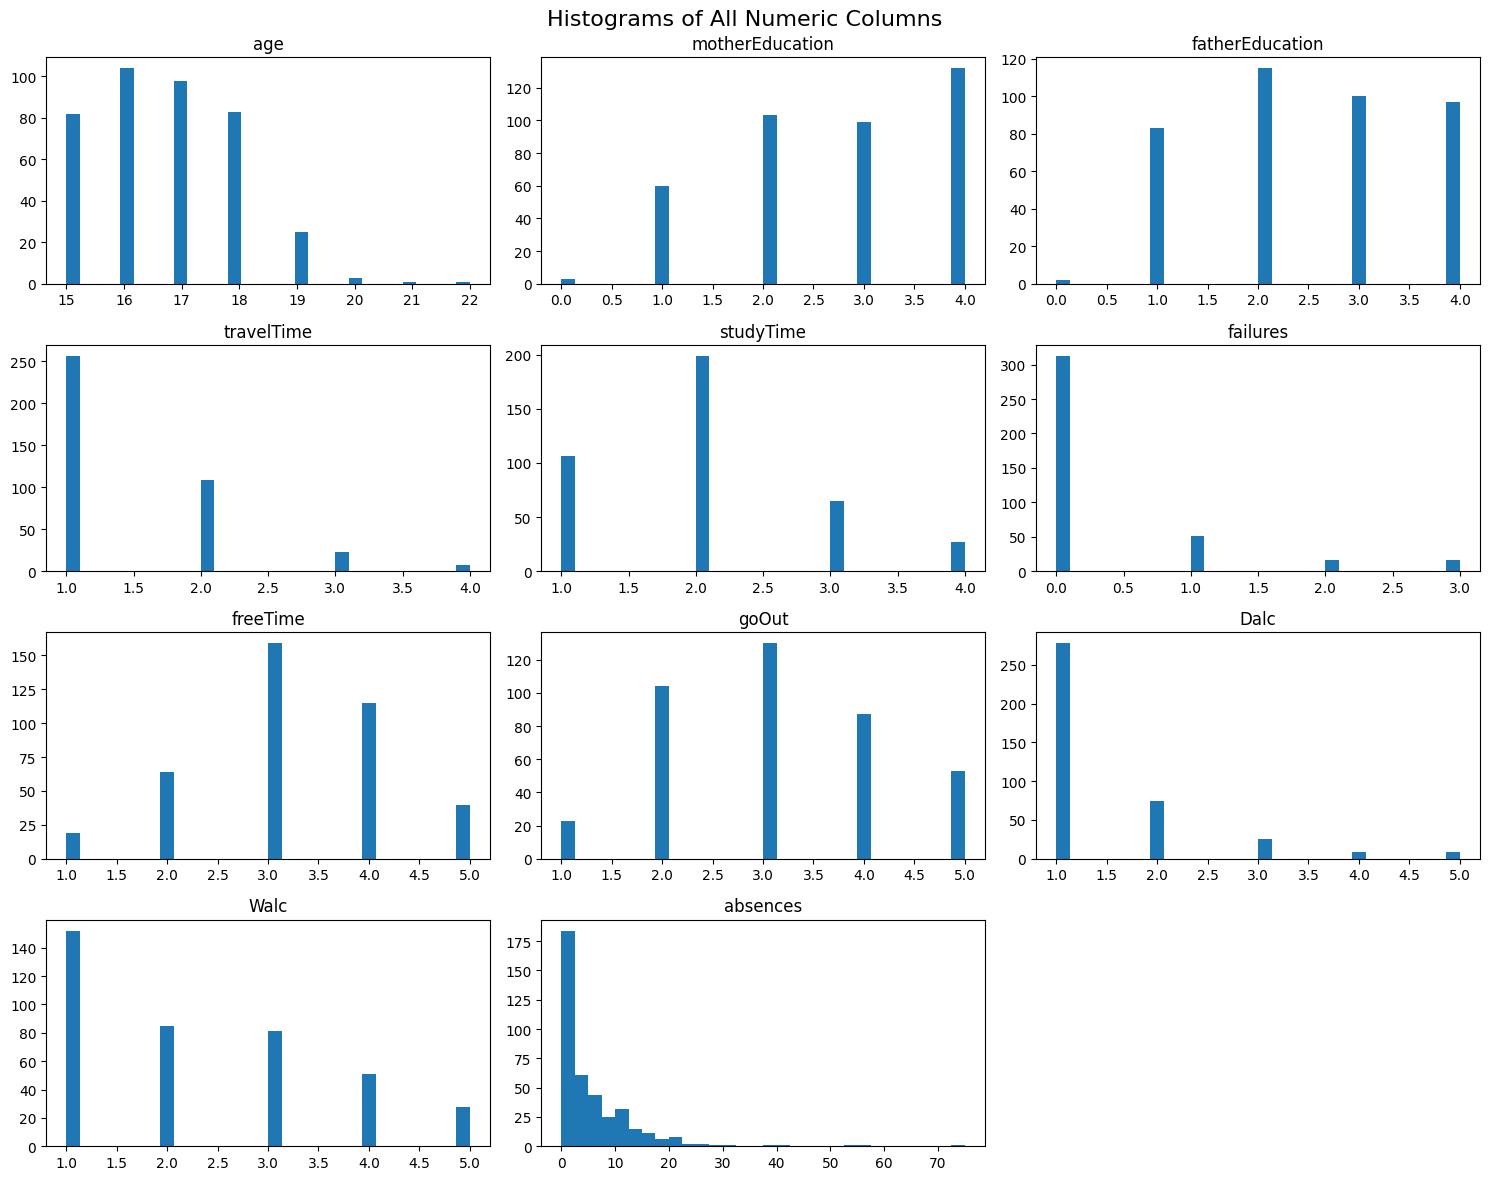

In [15]:
df[['age', 'motherEducation', 'fatherEducation', 'travelTime', 'studyTime', 'failures', 'freeTime', 'goOut', 'Dalc', 'Walc', 'absences']].hist(bins=30, figsize=(15, 12), grid=False)
plt.suptitle("Histograms of All Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
counts = df['absences'].value_counts().sort_index()
print(counts)

absences
0     116
1       3
2      65
3       8
4      53
5       5
6      32
7       7
8      22
9       3
10     17
11      3
12     12
13      3
14     12
15      3
16      7
17      1
18      5
19      1
20      4
21      1
22      3
23      1
24      1
25      1
26      1
28      1
30      1
38      1
40      1
54      1
56      1
75      1
Name: count, dtype: int64


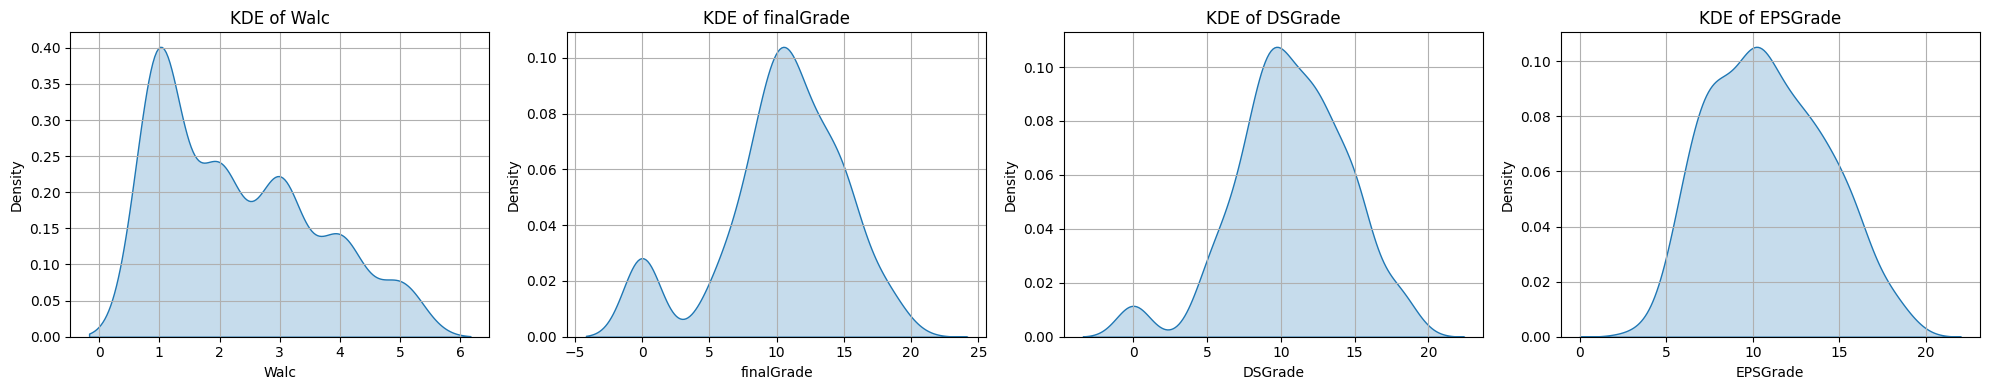

In [17]:
cols_to_plot = ['Walc', 'finalGrade', 'DSGrade', 'EPSGrade']

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 4))  # 1 row, multiple columns

for ax, col in zip(axes, cols_to_plot):
    sns.kdeplot(df[col], fill=True, ax=ax)
    ax.set_title(f'KDE of {col}')
    ax.grid(True)

plt.tight_layout()
plt.show()


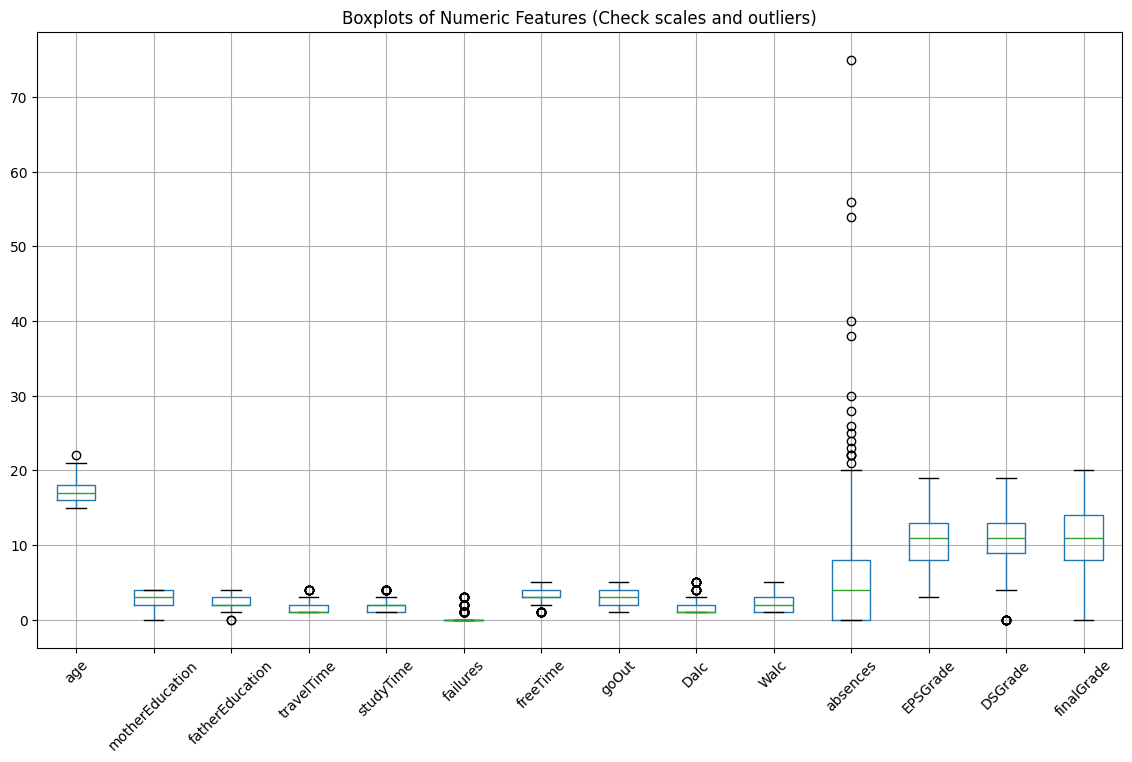

In [18]:

plt.figure(figsize=(14,8))
df.select_dtypes(include='number').boxplot(rot=45)
plt.title('Boxplots of Numeric Features (Check scales and outliers)')
plt.show()


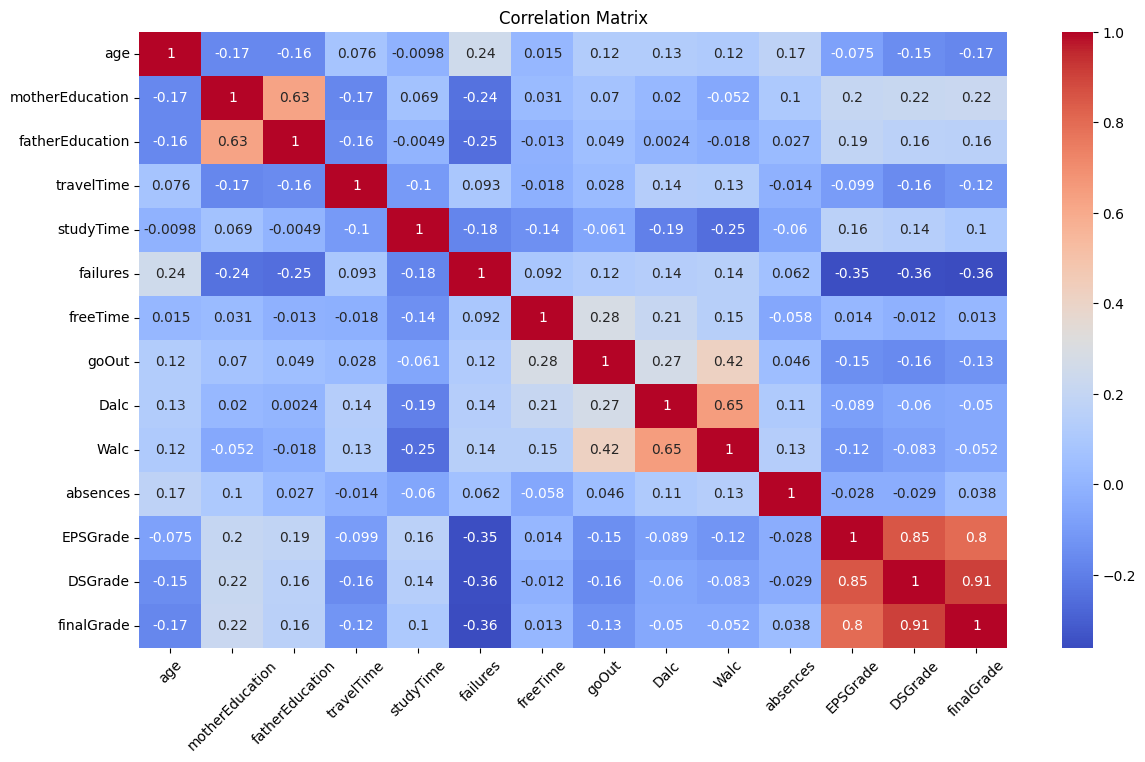

In [19]:
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()


# **<span style="color: #DBC39E;">Preprocessing and Feauture Engineering</span>**

## **<span style="color: #66B2FF;">Preprocess</span>** 

### **Handle the others values** 

In [20]:
df_v1 = df.copy()
other_ratio_mother_job = df_v1[df_v1['fatherJob'] == 'other']['fatherJob'].count() / df_v1.shape[0]
other_ratio_fatherjob = df_v1[df_v1['motherJob'] == 'other']['motherJob'].count() / df_v1.shape[0]
other_ration_reason = df_v1[df_v1['reason'] == 'other']['reason'].count() / df_v1.shape[0]


print("other counts for columns:")
print(f"motherJob others percentage: % {other_ratio_mother_job}")
print(f"fatherJob others percentage: % {other_ratio_fatherjob}")
print(f"reason others percentage: % {other_ration_reason}")


other counts for columns:
motherJob others percentage: % 0.5465994962216625
fatherJob others percentage: % 0.35768261964735515
reason others percentage: % 0.09319899244332494


#### 📌 **Feature Selection Decision**

Due to the high occurrence of the value **"other"** in the columns `motherJob` and `fatherJob`, we have decided to **remove** these two features from the dataset to maintain data quality and avoid noise in the analysis.


In [21]:
df_v2 = df_v1.drop(columns=['fatherJob', 'motherJob'])

#### 🔄 **Handling "other" Values in `reason` Column**

Since the value **"other"** occurs infrequently in the `reason` column,  
we will find suitable replacements for these entries by leveraging information from other relevant columns.

🏠 **Imputing Missing Values in `reason` Column Based on `travelTime`**

For the records where `travelTime` is equal to **1**, we assume the value of `reason` to be **"home"**.  
For the remaining records with missing or "other" values in `reason`, we replace them with the **mode** of the `reason` column from the rest of the dataset.



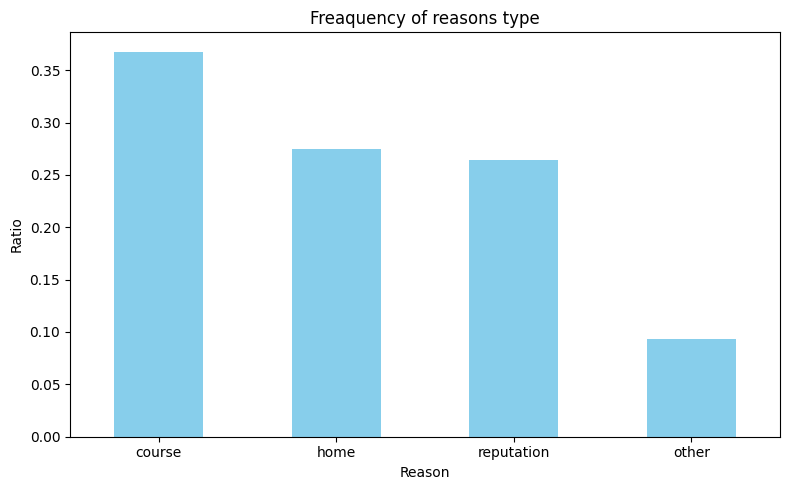

In [22]:
reasons_ratio = df_v2['reason'].value_counts() / df_v2.shape[0]

plt.figure(figsize=(8, 5))
reasons_ratio.plot(kind='bar', color='skyblue')

plt.title('Freaquency of reasons type')
plt.xlabel('Reason')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
near_home_other_ratio = df_v2[(df_v2['reason'] == 'other') & (df_v2['travelTime'] == 1)]['reason'].count() / df_v2[df_v2['reason'] == 'other'].shape[0]
print(f"reason others percentage with travelTime equal to 1: % {near_home_other_ratio}")

reason others percentage with travelTime equal to 1: % 0.6216216216216216


In [24]:
df_v2.loc[(df_v2['travelTime'] == 1) & (df['reason'] == 'other'), 'reason'] = 'home'
df_v2.loc[df_v2['reason'] == 'other', 'reason'] = 'course'

### **Handle Absences** 

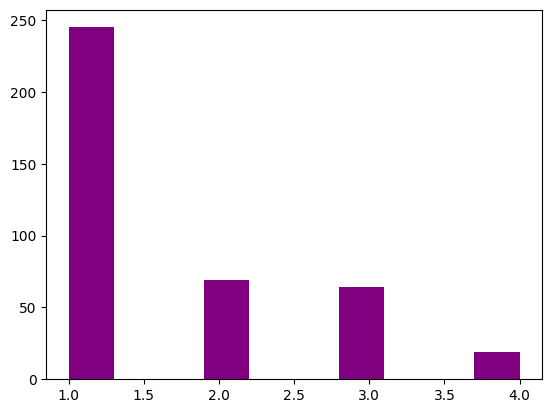

In [25]:
df_v3 = df_v2.copy()

conditions = [
    (df_v3['absences'] >= 0) & (df_v3['absences'] < 5),
    (df_v3['absences'] >= 5) & (df_v3['absences'] < 10),
    (df_v3['absences'] >= 10) & (df_v3['absences'] < 20),
    (df_v3['absences'] >= 20)
]

choices = [1, 2, 3, 4]

df_v3['absences'] = np.select(conditions, choices, default=np.nan)

df_v3['absences'].hist(grid=False, color='purple')
plt.show()


### **Categorical Conversion** 

In [26]:
def categorize_grade(grade):
    if grade > 17:
        return 'A'
    elif 14 <= grade <= 17:
        return 'B'
    elif 10 <= grade < 14:
        return 'C'
    else:
        return 'F'
    
df_v4 = df_v3.copy()
df_v4['finalGrade'] = df_v4['finalGrade'].apply(categorize_grade)

### **Final Data** 

In [27]:
final_df = df_v4.copy()
final_df.to_csv(CLEANED_DATASET_PATH, index=False)

# **<span style="color: #DBC39E;">Models</span>**

In [28]:
df = pd.read_csv(CLEANED_DATASET_PATH)

## **<span style="color: #66B2FF;">Train-Test Split & Normalization/Standardization</span>** 

### **Log-transform**

In [29]:
def log_transform(x_train, x_test):
    log_columns = ['DSGrade', 'EPSGrade']
    x_train[log_columns] = np.log1p(x_train[log_columns])
    x_test[log_columns] = np.log1p(x_test[log_columns])

### **Standardization / Normalization**

In [30]:
def standardization(x_train, x_test):
    numeric_cols = ['DSGrade', 'EPSGrade', 'age', 'absences', 'studyTime', 'freeTime', 'goOut', 'Dalc', 'Walc']
    scaler = StandardScaler()
    x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
    x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [31]:
def normalization(x_train, x_test):
    numeric_cols = ['DSGrade', 'EPSGrade', 'age', 'absences', 'studyTime', 'freeTime', 'goOut', 'Dalc', 'Walc']
    scaler = MinMaxScaler()
    x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
    x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

### **Encode**

In [32]:
def encode(x_train, x_test):
    le = LabelEncoder()
    for col in ['university', 'sex', 'address', 'reason', 'paid', 'higher', 'internet', 'romantic', 'universitySupport']:
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.transform(x_test[col])

### **Train-Test Split**

In [33]:
def split(df, seed=None):
    x = df.drop(columns=['finalGrade'])
    y = df['finalGrade']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

    log_transform(x_train, x_test)
    standardization(x_train, x_test)
    encode(x_train, x_test)

    return x_train, x_test, y_train, y_test


def split_for_naive_bayes(df, seed=None):
    x = df.drop(columns=['finalGrade'])
    y = df['finalGrade']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

    numeric_cols = ['DSGrade', 'EPSGrade', 'age', 'absences', 'studyTime', 'freeTime', 'goOut', 'Dalc', 'Walc']
    kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
    x_train[numeric_cols] = kbins.fit_transform(x_train[numeric_cols])
    x_test[numeric_cols] = kbins.transform(x_test[numeric_cols])

    encode(x_train, x_test)

    return x_train, x_test, y_train, y_test

## **<span style="color: #66B2FF;">Sklearn Models</span>** 

### **Naive Bayes**

In [52]:
x_train, x_test, y_train, y_test = split_for_naive_bayes(df)

model = CategoricalNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: %{accuracy_score(y_test, y_pred) * 100}")
print(classification_report(y_test, y_pred))


[[ 1  4  0  0]
 [ 0 15  5  0]
 [ 0  1 29  3]
 [ 0  0  1 21]]
Accuracy: %82.5
              precision    recall  f1-score   support

           A       1.00      0.20      0.33         5
           B       0.75      0.75      0.75        20
           C       0.83      0.88      0.85        33
           F       0.88      0.95      0.91        22

    accuracy                           0.82        80
   macro avg       0.86      0.70      0.71        80
weighted avg       0.83      0.82      0.81        80



### **Decision Tree (without pruning)**

Index(['university', 'sex', 'age', 'address', 'motherEducation',
       'fatherEducation', 'reason', 'travelTime', 'studyTime', 'failures',
       'universitySupport', 'paid', 'higher', 'internet', 'romantic',
       'freeTime', 'goOut', 'Dalc', 'Walc', 'absences', 'EPSGrade', 'DSGrade'],
      dtype='object')
time duration: 0.003010272979736328 second
***********************************
Accuracy: %81.25
confusion matrix: 
[[ 4  1  0  0]
 [ 0 12  3  0]
 [ 0  2 26  2]
 [ 0  0  7 23]]
***********************************

               precision    recall  f1-score   support

           A       1.00      0.80      0.89         5
           B       0.80      0.80      0.80        15
           C       0.72      0.87      0.79        30
           F       0.92      0.77      0.84        30

    accuracy                           0.81        80
   macro avg       0.86      0.81      0.83        80
weighted avg       0.83      0.81      0.81        80



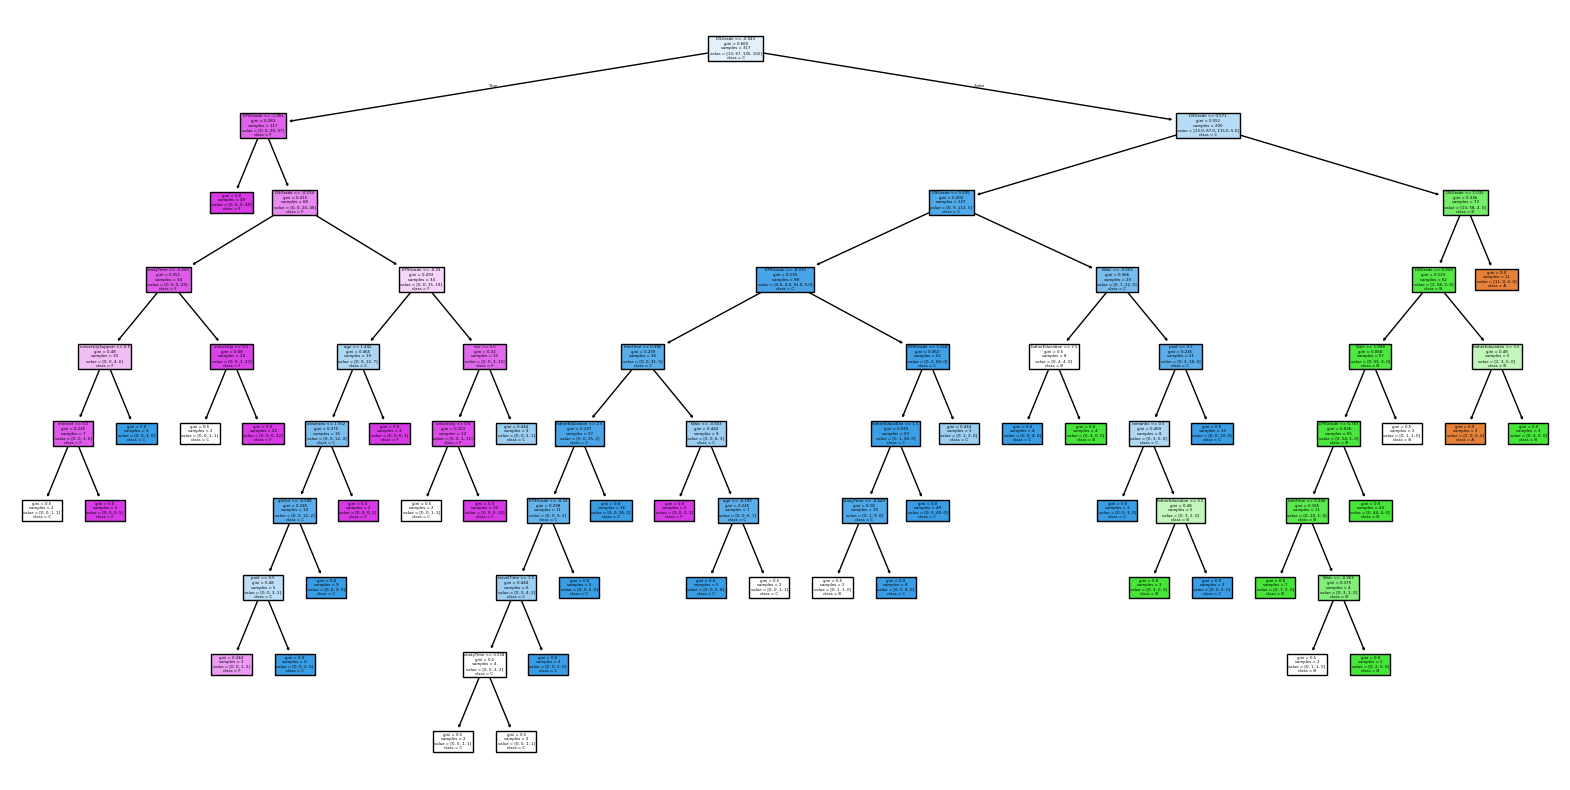

DSGrade: 0.762
EPSGrade: 0.051
fatherEducation: 0.047
Walc: 0.021
age: 0.018
universitySupport: 0.016
studyTime: 0.013
absences: 0.013
paid: 0.012
university: 0.009
sex: 0.008
romantic: 0.007
freeTime: 0.006
goOut: 0.005
Dalc: 0.005
internet: 0.004
travelTime: 0.003
address: 0.000
motherEducation: 0.000
reason: 0.000
failures: 0.000
higher: 0.000


In [54]:
print(x_train.columns)
x_train, x_test, y_train, y_test = split(df)

start = time.time()
clf = DecisionTreeClassifier(
    random_state=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
)
clf.fit(x_train, y_train)

y2_pred = clf.predict(x_test)
end = time.time()

print(f"time duration: {end - start} second")
print("***********************************")
print(f"Accuracy: %{accuracy_score(y_test, y2_pred) * 100}")
print(f"confusion matrix: \n{confusion_matrix(y_test, y2_pred)}")
print("***********************************")
print('\n', classification_report(y_test, y2_pred))

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=x_train.columns, class_names=clf.classes_, filled=True)
plt.show()

importances = clf.feature_importances_
for feature, importance in sorted(zip(x_train.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.3f}")


### **Decision Tree (With Pruning)**

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
***********************************
Accuracy: %88.75
confusion matrix: 
[[ 6  0  0  0]
 [ 1 10  2  0]
 [ 0  1 23  3]
 [ 0  0  2 32]]
***********************************

               precision    recall  f1-score   support

           A       0.86      1.00      0.92         6
           B       0.91      0.77      0.83        13
           C       0.85      0.85      0.85        27
           F       0.91      0.94      0.93        34

    accuracy                           0.89        80
   macro avg       0.88      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



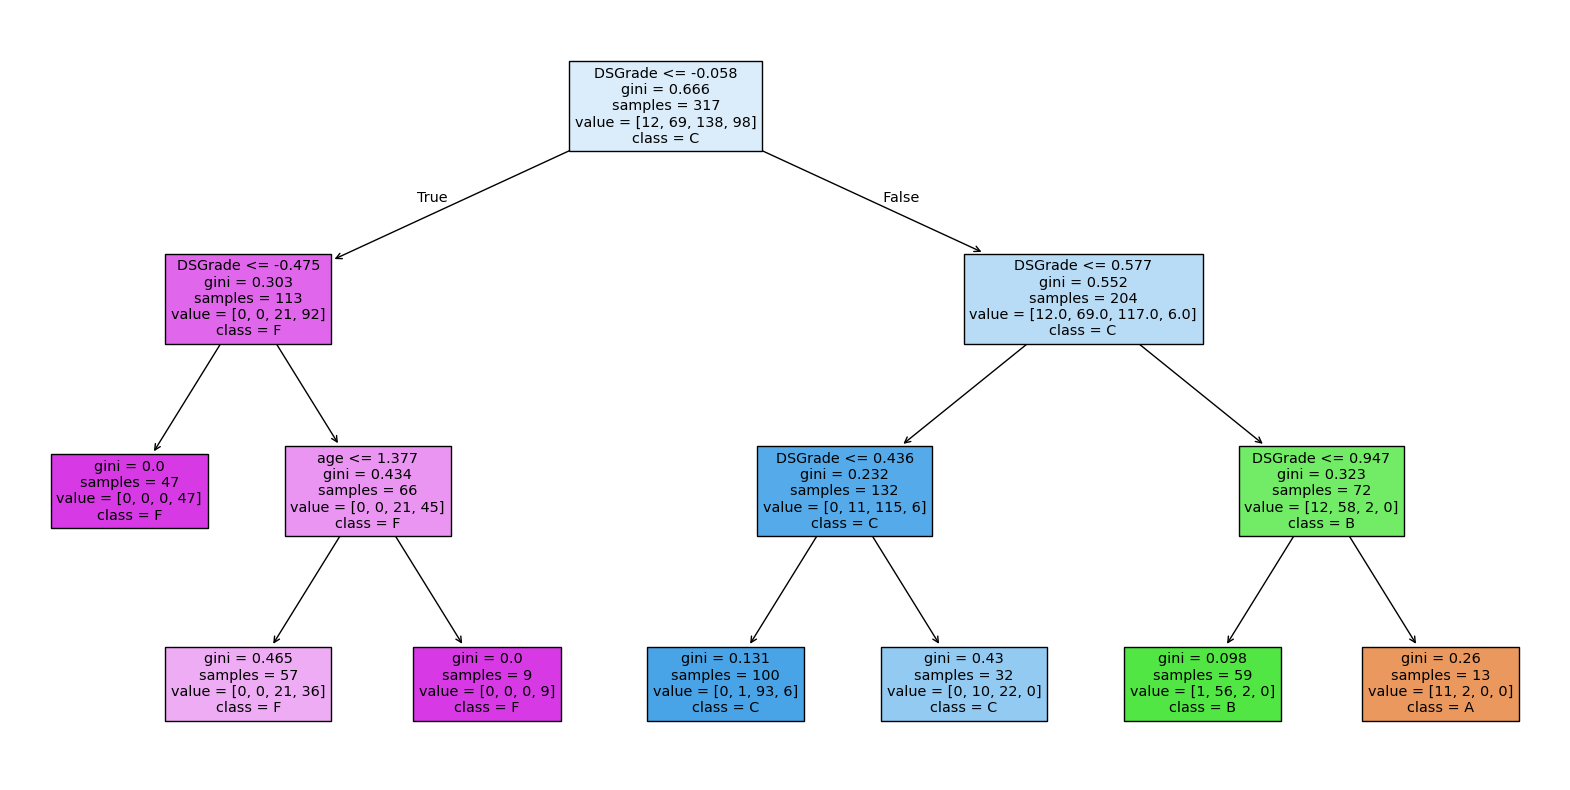

DSGrade: 0.986
age: 0.014
university: 0.000
sex: 0.000
address: 0.000
motherEducation: 0.000
fatherEducation: 0.000
reason: 0.000
travelTime: 0.000
studyTime: 0.000
failures: 0.000
universitySupport: 0.000
paid: 0.000
higher: 0.000
internet: 0.000
romantic: 0.000
freeTime: 0.000
goOut: 0.000
Dalc: 0.000
Walc: 0.000
absences: 0.000
EPSGrade: 0.000


In [36]:
x_train, x_test, y_train, y_test = split(df, seed=173)

params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)



best_model = grid_search.best_estimator_
y2_pred = best_model.predict(x_test)
print("Best Parameters:", grid_search.best_params_)
print("***********************************")
print(f"Accuracy: %{accuracy_score(y_test, y2_pred) * 100}")
print(f"confusion matrix: \n{confusion_matrix(y_test, y2_pred)}")
print("***********************************")
print('\n', classification_report(y_test, y2_pred))

plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=x_train.columns, class_names=best_model.classes_, filled=True)
plt.show()

importances = best_model.feature_importances_
for feature, importance in sorted(zip(x_train.columns, importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.3f}")

### **Random Forest**

In [55]:
x_train, x_test, y_train, y_test = split(df, seed=120)


param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced')
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
)

random_search.fit(x_train, y_train)

best_rf = random_search.best_estimator_

y3_pred = best_rf.predict(x_test)

print("Best Parameters:", random_search.best_params_)
print("***********************************")
print(f"Accuracy: %{accuracy_score(y_test, y3_pred) * 100}")
print(f"confusion matrix: \n{confusion_matrix(y_test, y3_pred)}")
print("***********************************")
print('\n', classification_report(y_test, y3_pred))


Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
***********************************
Accuracy: %91.25
confusion matrix: 
[[ 2  0  0  0]
 [ 1 19  0  0]
 [ 0  2 28  4]
 [ 0  0  0 24]]
***********************************

               precision    recall  f1-score   support

           A       0.67      1.00      0.80         2
           B       0.90      0.95      0.93        20
           C       1.00      0.82      0.90        34
           F       0.86      1.00      0.92        24

    accuracy                           0.91        80
   macro avg       0.86      0.94      0.89        80
weighted avg       0.93      0.91      0.91        80



### **XGBoost**

In [38]:
x_train, x_test, y_train, y_test = split(df)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

xgb_model = XGBClassifier(eval_metric='mlogloss')

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5], 
    'min_split_loss': [0, 1],       
    'subsample': [0.8],             
    'colsample_bytree': [0.6, 0.8, 1.0], 
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

print("Best Parameters:", grid_search.best_params_)
print("***********************************")
print(f"Accuracy: %{accuracy_score(y_test, y_pred) * 100}")
print(f"confusion matrix: \n{confusion_matrix(y_test, y_pred)}")
print("***********************************")
print('\n', classification_report(y_test, y_pred))



Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'min_split_loss': 0, 'n_estimators': 50, 'subsample': 0.8}
***********************************
Accuracy: %85.0
confusion matrix: 
[[ 1  0  0  0]
 [ 1 10  3  0]
 [ 0  0 33  3]
 [ 0  0  5 24]]
***********************************

               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.71      0.83        14
           2       0.80      0.92      0.86        36
           3       0.89      0.83      0.86        29

    accuracy                           0.85        80
   macro avg       0.80      0.86      0.80        80
weighted avg       0.87      0.85      0.85        80



## **<span style="color: #66B2FF;">Decision Tree from Scratch</span>** 

In [56]:
from dtCore import DecisionTreeScratch

x_train, x_test, y_train, y_test = split(df, seed=730)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

start = time.time()
model = DecisionTreeScratch(
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=2,
    )
model.fit(x_train, y_train)

y_pred = model.predict(x_test.values)
end = time.time()

print(f"time duration: {end - start} second")
print("***********************************")
print(f"Accuracy: %{accuracy_score(y_test, y_pred) * 100}")
print(f"confusion matrix: \n{confusion_matrix(y_test, y_pred)}")
print("***********************************")
print(classification_report(y_test, y_pred))


time duration: 0.010775327682495117 second
***********************************
Accuracy: %83.75
confusion matrix: 
[[ 2  1  0  0]
 [ 0 13  4  0]
 [ 0  1 25  5]
 [ 0  0  2 27]]
***********************************
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.87      0.76      0.81        17
           2       0.81      0.81      0.81        31
           3       0.84      0.93      0.89        29

    accuracy                           0.84        80
   macro avg       0.88      0.79      0.83        80
weighted avg       0.84      0.84      0.84        80



## **<span style="color: #66B2FF;">Comparison with Library Implementation</span>** 

| Feature                         | Scratch Implementation                            | Scikit-Learn Implementation                     |
|----------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Ease of Use**                  | Requires full manual coding of the algorithm      | Very easy to use with just a few lines of code   |
| **Execution Speed**              | Slower, especially on large datasets              | Highly optimized and fast                        |
| **Time (Training/Prediction)**   | Typically longer due to unoptimized loops(0.1s)         | Much faster due to compiled and optimized code(0.01s)   |
| **Flexibility & Customization** | Fully customizable; you control every detail      | Limited customization unless you subclass        |
| **Debugging & Learning**         | Helps deeply understand the algorithm’s behavior  | More of a black box, less insight into internals |
| **Error Handling**               | Must implement checks and balances manually       | Built-in validation and error handling           |
| **Accuracy**                     | Comparable if implemented correctly               | Often higher due to optimizations and pruning    |
| **Visualization Support**        | Needs to be implemented separately                | Built-in tools like `plot_tree()`                |
| **Scalability**                  | Not scalable for large data without optimization  | Scales well with large datasets                  |
| **Reusability**                  | Low; specific to the use case                     | High; can be reused across multiple projects     |


# **<span style="color: #DBC39E;">Performance Measures</span>**

### 🔹 1. Confusion Matrix

The **confusion matrix** for multi-class classification is a square matrix where each row represents the actual class and each column represents the predicted class.

- Diagonal entries: Correct predictions (true positives for each class)
- Off-diagonal entries: Misclassifications (false positives and false negatives for other classes)

This matrix helps visualize which classes are being confused with each other.

---

### 🔹 2. Precision (per class)

Precision for each class is defined as:

$$
\text{Precision}_i = \frac{TP_i}{TP_i + FP_i}
$$

Where:
- \( TP_i \): True positives for class *i*
- \( FP_i \): False positives for class *i*

---

### 🔹 3. Recall (Sensitivity, per class)

Recall for each class is:

$$
\text{Recall}_i = \frac{TP_i}{TP_i + FN_i}
$$

Where:
- \( FN_i \): False negatives for class *i*

---

### 🔹 4. F1-Score (per class)

The F1 score for each class is:

$$
F1_i = 2 \times \frac{\text{Precision}_i \times \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}
$$

---

### 🔹 5. Accuracy

Overall accuracy is still defined as:

$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} = \frac{\sum_i TP_i}{\text{Total instances}}
$$

Note: Accuracy may not reflect performance well in imbalanced datasets.

---

### 🔹 6. Averaging Methods

To summarize Precision, Recall, and F1 across all classes, we use these averaging strategies:

- **Macro average**  
  Calculates the metric independently for each class, then takes the unweighted mean. Treats all classes equally.

  $$
  \text{Macro-F1} = \frac{1}{C} \sum_{i=1}^C F1_i
  $$

- **Micro average**  
  Aggregates all true positives, false positives, and false negatives globally, then computes the metric. Favors classes with more instances.

  $$
  \text{Micro-Precision} = \frac{\sum TP_i}{\sum (TP_i + FP_i)}
  $$

- **Weighted average**  
  Computes metrics per class and takes a weighted mean based on the number of true instances in each class.

  $$
  \text{Weighted-F1} = \sum_{i=1}^C w_i \cdot F1_i \quad \text{where } w_i = \frac{\text{Support}_i}{\text{Total instances}}
  $$

---